In [220]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
df_alexa = pd.read_csv('amazon-alexa.tsv', sep='\t')

In [222]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [223]:
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [224]:
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [9]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# Data Visualization

In [123]:
positive = df_alexa[df_alexa['feedback'] == 1]

In [13]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [124]:
negative = df_alexa[df_alexa['feedback'] == 0]

In [15]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


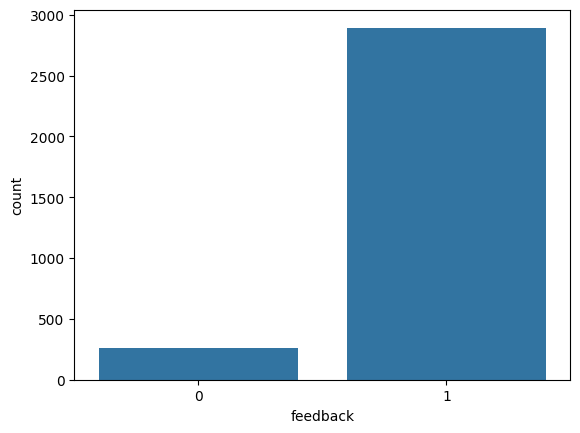

In [225]:
sns.countplot(x = 'feedback', data = df_alexa);
#df_alexa['feedback'].value_counts()

<Axes: xlabel='rating', ylabel='count'>

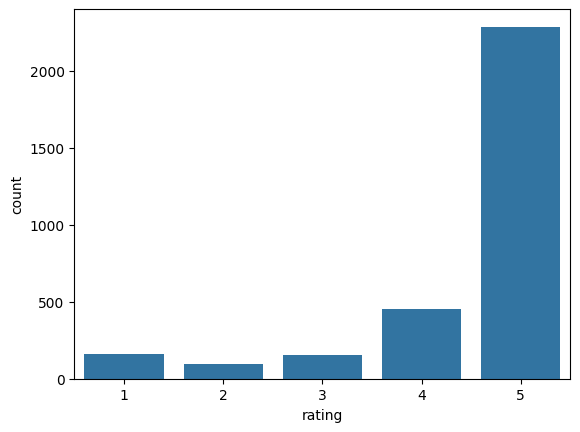

In [17]:
sns.countplot(x = 'rating', data=df_alexa);

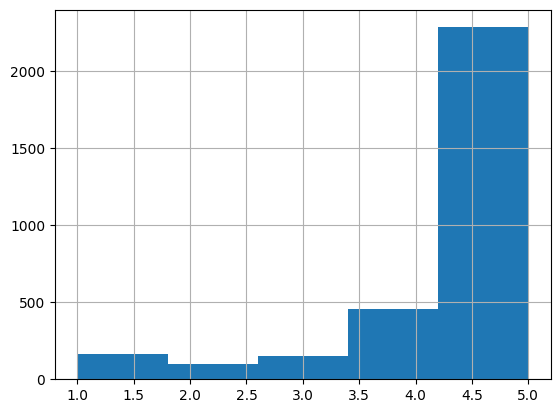

In [32]:
df_alexa['rating'].hist(bins=5);

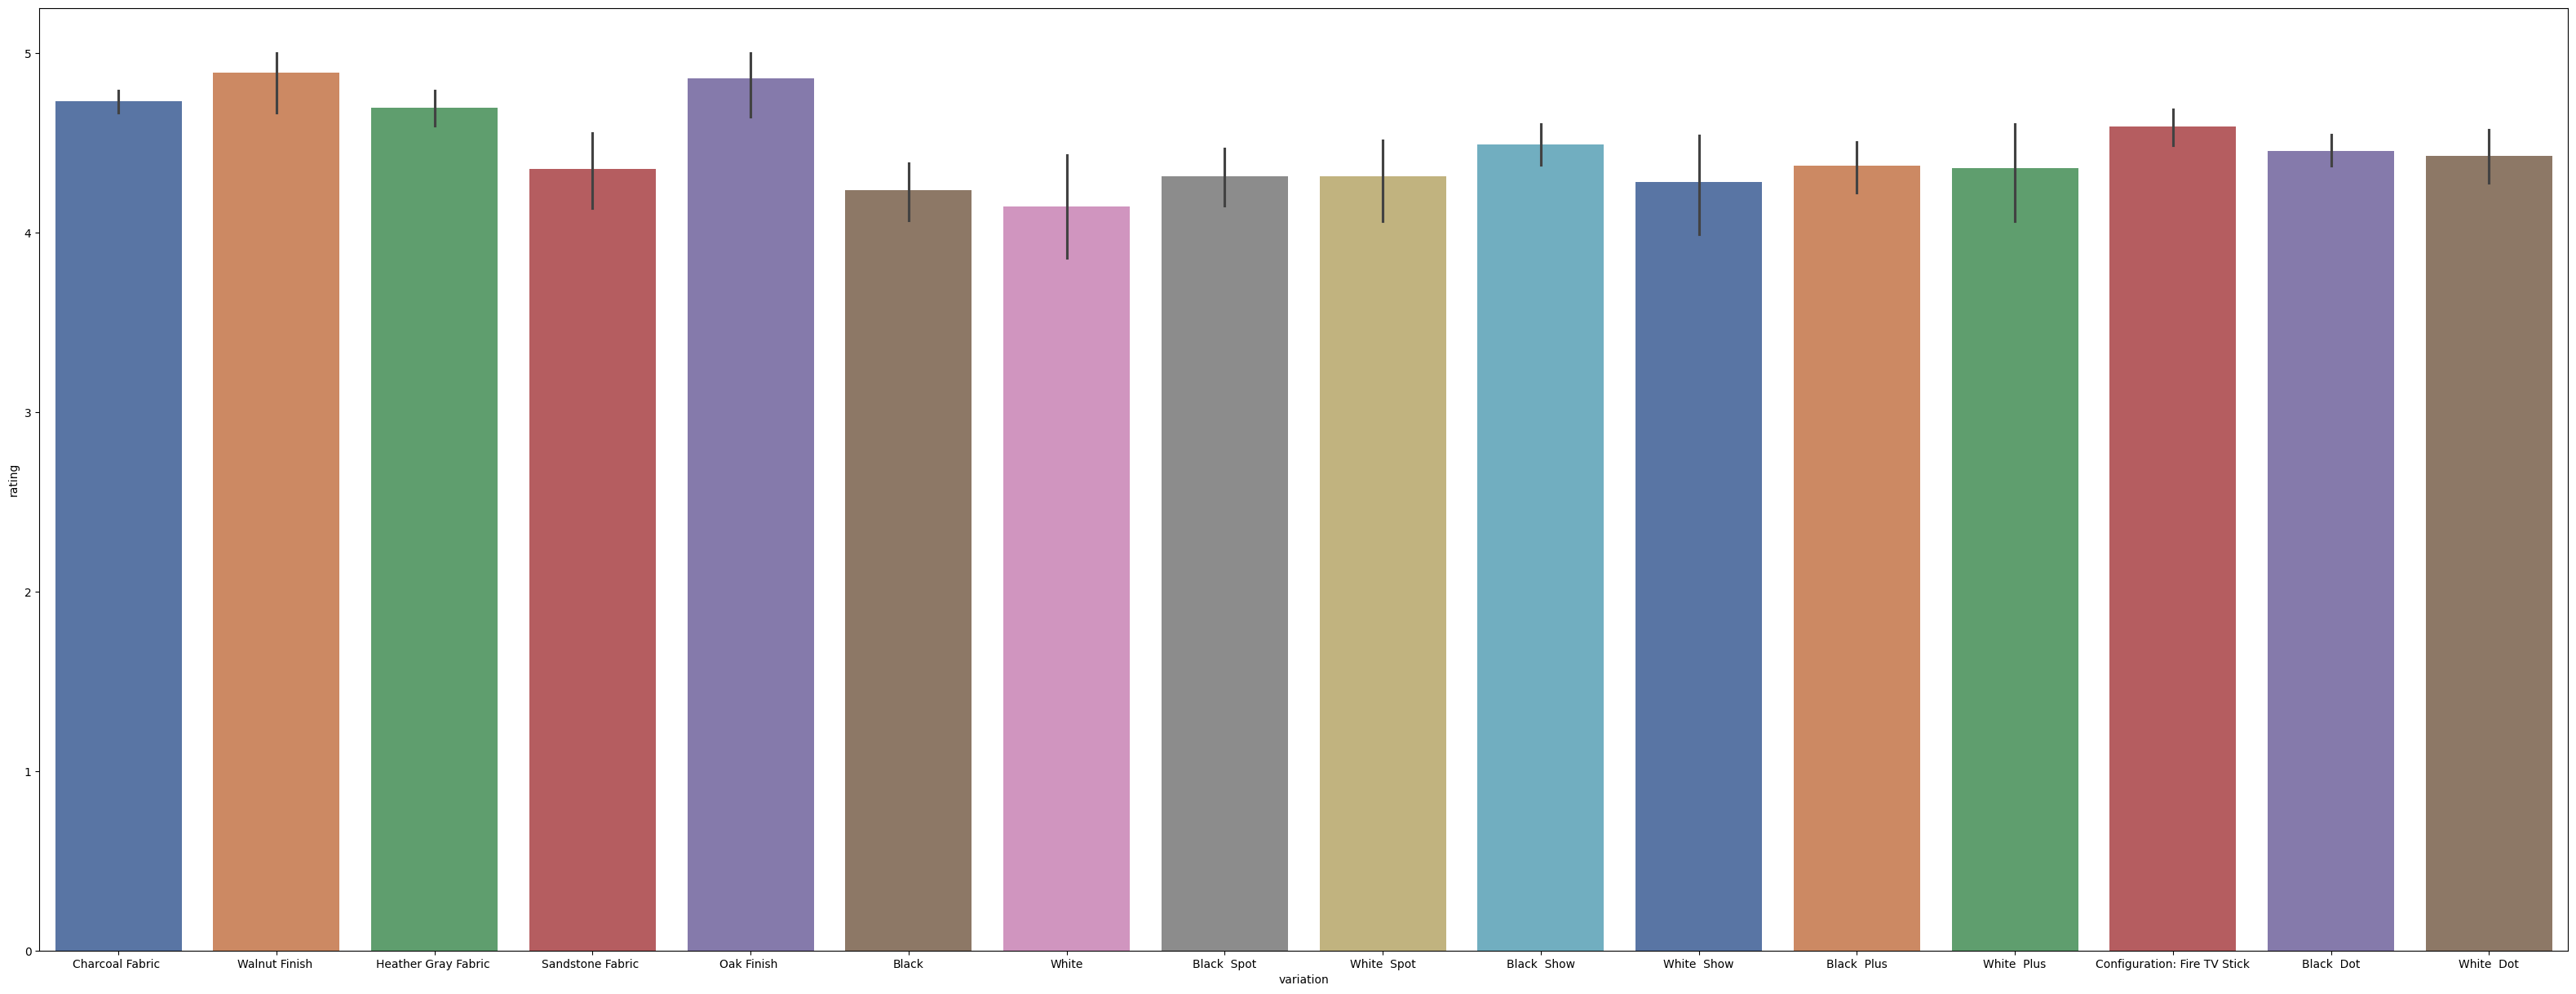

In [38]:
plt.figure(figsize=(40,15))
sns.barplot(x='variation', y='rating', palette='deep', data =df_alexa, hue='variation');

# Cleaning data

In [226]:
df_alexa = df_alexa.drop(['date', 'rating'], axis = 1)

In [227]:
df_alexa

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [228]:
variation_dummies = pd.get_dummies(df_alexa['variation'])

In [229]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [230]:
df_alexa.drop('variation', axis=1, inplace=True)

In [231]:
df_alexa

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [232]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis = 1)

In [233]:
df_alexa.head()

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


# Tokenization Example

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?']

In [55]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [58]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [79]:
print(x.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# Database Tokenization

In [234]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()


In [258]:
index = df_alexa[df_alexa['verified_reviews'].isnull()].index
#df = df_alexa.drop(index)

if len(index) > 0:
  df_alexa.iloc[index[:], 0] = ""


In [263]:
alexa_countvetorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])
alexa_countvetorizer.shape


(3150, 4044)

In [264]:
type(alexa_countvetorizer)

scipy.sparse._csr.csr_matrix

In [265]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [266]:
print(alexa_countvetorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [267]:
print(alexa_countvetorizer.toarray()[0])

[0 0 0 ... 0 0 0]


In [270]:
df_alexa.drop(['verified_reviews'], axis = 1, inplace=True)

In [271]:
df_alexa.shape

(3150, 17)

In [272]:
reviews = pd.DataFrame(alexa_countvetorizer.toarray())

In [273]:
reviews.shape

(3150, 4044)

In [284]:
df = pd.concat([df_alexa, reviews], axis = 1)

In [285]:
df.shape

(3150, 4061)

In [293]:
x = df.drop(['feedback'], axis = 1)


In [294]:
x

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,False,True,False,False,False,False,...,0,1,0,0,0,0,0,0,0,0
4,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [325]:
y = df['feedback']

In [326]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [327]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [328]:
x_train.shape

(2520, 4060)

In [329]:
x_test.shape

(630, 4060)

# Fit the model

In [336]:
# 4060 -> 400 -> 400 -> 1
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4060,)))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [337]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 400)               1624400   
                                                                 
 dense_8 (Dense)             (None, 400)               160400    
                                                                 
 dense_9 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1785201 (6.81 MB)
Trainable params: 1785201 (6.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [338]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [343]:
# True -> 1 and False -> 0
x_train = x_train.apply(lambda x: x.apply(lambda y: 1 if y else 0))
x_test = x_test.apply(lambda x: x.apply(lambda y: 1 if y else 0))

epochs_hist = classifier.fit(x_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 3s 24ms/step - loss: 0.2605 - accuracy: 0.9226
Epoch 2/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0804 - accuracy: 0.9710
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0277 - accuracy: 0.9909
Epoch 4/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0175 - accuracy: 0.9948
Epoch 5/10
79/79 [==============================] - 2s 26ms/step - loss: 0.0166 - accuracy: 0.9933
Epoch 6/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0163 - accuracy: 0.9929
Epoch 7/10
79/79 [==============================] - 2s 25ms/step - loss: 0.0164 - accuracy: 0.9929
Epoch 8/10
79/79 [==============================] - 2s 24ms/step - loss: 0.0159 - accuracy: 0.9940
Epoch 9/10
79/79 [==============================] - 3s 39ms/step - loss: 0.0159 - accuracy: 0.9933
Epoch 10/10
79/79 [==============================] - 3s 32ms/step - loss: 0.0137 - accuracy: 0.9948


# Model Assessment

In [344]:
from sklearn.metrics import classification_report, confusion_matrix

In [345]:
y_pred_train = classifier.predict(x_train)
y_pred_train

79/79 [==============================] - 1s 13ms/step


array([[1.        ],
       [0.9999996 ],
       [1.        ],
       ...,
       [1.        ],
       [0.999897  ],
       [0.99999887]], dtype=float32)

In [346]:
y_pred_train = (y_pred_train > 0.5)
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [347]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 186,   12],
       [   1, 2321]])

<Axes: >

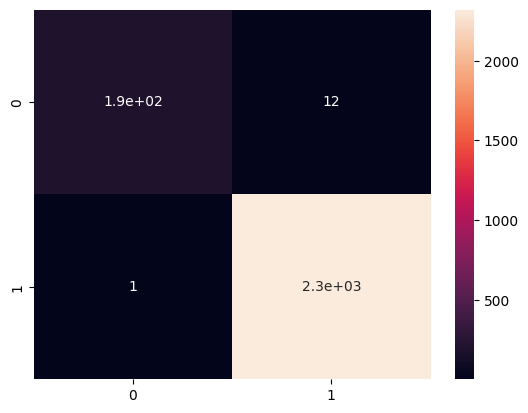

In [349]:
sns.heatmap(cm, annot=True)

In [350]:
y_pred_test = classifier.predict(x_test)
y_pred_test

20/20 [==============================] - 0s 4ms/step


array([[9.9988151e-01],
       [9.9999440e-01],
       [9.9999946e-01],
       [9.7006613e-01],
       [9.1934550e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9998647e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.6574748e-01],
       [8.6644548e-01],
       [9.9999988e-01],
       [9.9996841e-01],
       [9.9999982e-01],
       [9.9997884e-01],
       [1.0000000e+00],
       [9.9998629e-01],
       [9.9998879e-01],
       [1.0000000e+00],
       [9.9999923e-01],
       [1.0000000e+00],
       [9.9987668e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9991709e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999785e-01],
       [1.0000000e+00],
       [9.9997008e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9998355e-01],
       [9.9987668e-01],
       [9.9999356e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.000000

In [355]:
y_pred_test = (y_pred_test > 0.5)
y_pred_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [352]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 16,  43],
       [  6, 565]])

<Axes: >

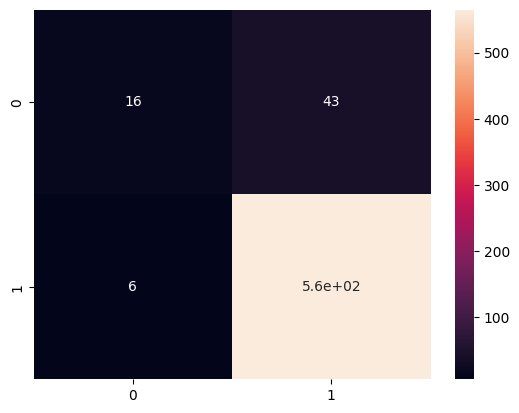

In [353]:
sns.heatmap(cm, annot=True)

In [356]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

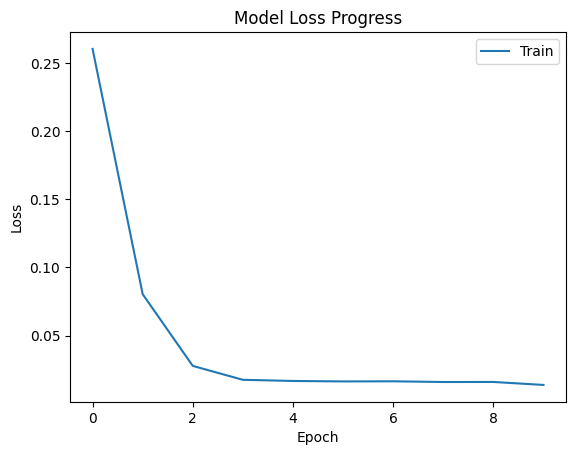

In [358]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

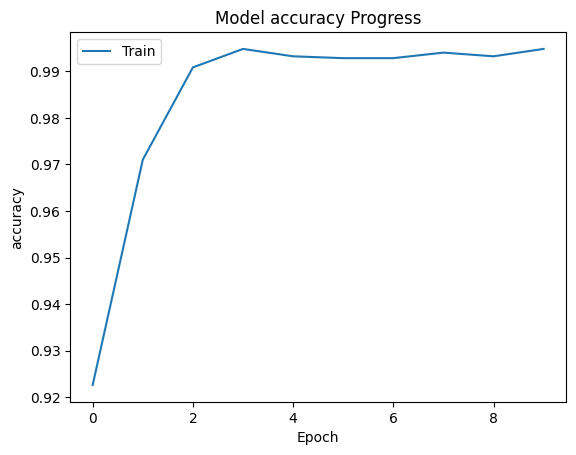

In [359]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy Progress')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])